In [7]:
import pandas as pd 
import numpy as np

### 26-02-2020

### bar chart 
scatter plot

### why visualization
.visual memory is more stronger
 and any information you are showing visually the rettention is higher

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [18]:
hr_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt')
hr_data.rename(columns={'sales':'department'},inplace=True)

In [19]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [20]:
hr_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### plotting department wise distribution

In [23]:
res = hr_data.department.value_counts()

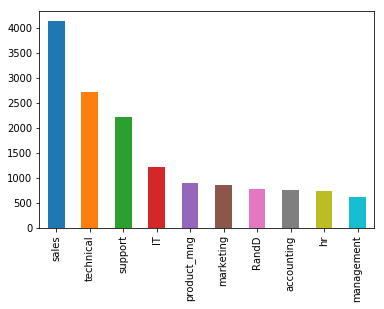

In [24]:
res.plot.bar()

### plotting salary wise distribution

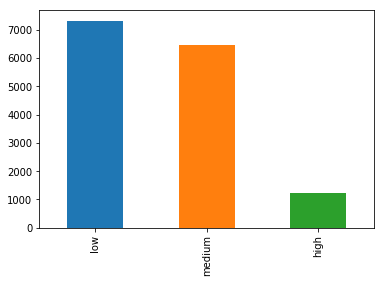

In [26]:
hr_data.salary.value_counts().plot.bar()

### these are bar charts
to plot frequency of a categorical column use bar chart
and if data is serier the bar chart is one layered

In [28]:
# give the hike to people who are working more than 4 projects

In [31]:
def f(r):
    if r.number_project > 4:
        if r.salary == 'medium':
            return 'high'
        elif r.salary == 'low':
            return 'medium'
        else:
            return 'high'
    else:
        return r.salary

hr_data['new_salary'] = hr_data.apply (f,axis = 1)

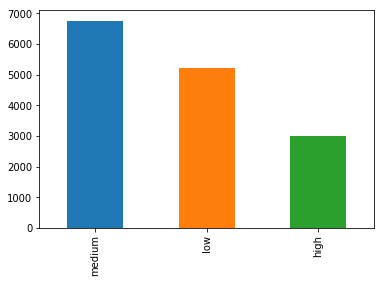

In [33]:
hr_data.new_salary.value_counts().plot.bar()

In [39]:
n_salary = hr_data.new_salary.value_counts()
o_salary = hr_data.salary.value_counts()

In [41]:
o_salary

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [44]:
salary_com = pd.DataFrame({'Old salary':o_salary,'New salary' : n_salary})

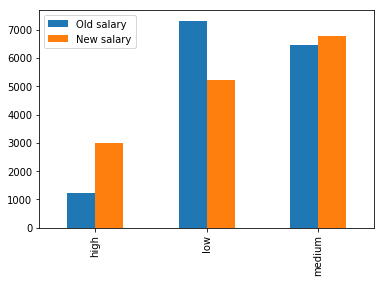

In [45]:
salary_com.plot.bar()

### adult_data

In [46]:
cols = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship'
        ,'race','sex','capital-gain','capital-loss','hours-per-week','native-country','Salary']
adult_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/adult.data.txt',names = cols)


In [48]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
Salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


### plotting education wise distrubution

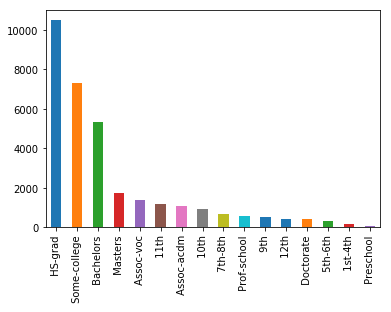

In [50]:
adult_data.education.value_counts().plot.bar()

### scatter plot

to understand trend/relationship between continious data

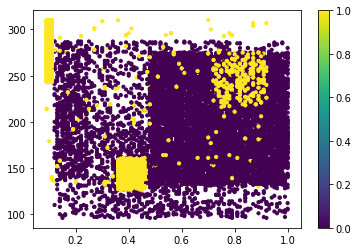

In [74]:
plt.scatter(x= hr_data.satisfaction_level,y = hr_data.average_montly_hours,s=10 ,c= hr_data.left)
plt.xlabel=('satisfaction level')
plt.ylabel=('average monthly hours')
plt.colorbar()

In [67]:
adult_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Salary'],
      dtype='object')

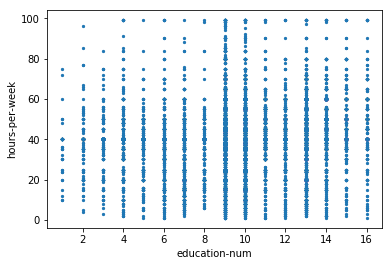

In [75]:
adult_data.plot.scatter(x = 'education-num',y = 'hours-per-week',s = 5 )

In [76]:
adult_data['sex'] = adult_data.sex.str.strip()

In [78]:
adult_data['sex_num'] = adult_data.sex.map(lambda x:1 if x == 'Male' else 0)

In [79]:
adult_data.sex_num.value_counts()

1    21790
0    10771
Name: sex_num, dtype: int64

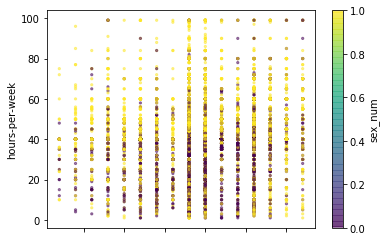

In [84]:
adult_data.plot.scatter(x = 'education-num',y = 'hours-per-week',s = 5,c =  'sex_num', cmap = 'viridis',alpha = .5)

### piechart

([<matplotlib.patches.Wedge at 0xb4252b0>,
 [Text(0.04226778373338524, 1.0991876247748915, 'low'),
  Text(-0.32247422223497674, -1.051670279124568, 'medium'),
  Text(1.06328474507822, -0.28182539077227425, 'high')],
 [Text(0.02305515476366467, 0.5995568862408499, '49'),
  Text(-0.1758950303099873, -0.5736383340679462, '43'),
  Text(0.5799734973153926, -0.1537229404212405, '8')])

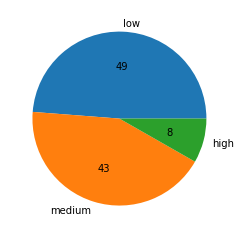

In [93]:
plt.pie(x=o_salary,labels = o_salary.index,autopct = '%.f')

In [87]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
    the fractional area directly and the array will not be normalized. The
    resulting pie will have an empty wedge of size ``1 - sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : array-like
        The wedge sizes.
    
    explode : array-like, optional, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : list,

In [102]:
edu = adult_data.education.value_counts()

([<matplotlib.patches.Wedge at 0xb54c790>,
 [Text(0.5820899380125792, 0.9333655790013428, ' HS-grad'),
  Text(-1.0080460983118946, 0.44027612208495526, ' Some-college'),
  Text(-0.7597721283465596, -0.7954535266046276, ' Bachelors'),
  Text(-0.08741327393996691, -1.096521280933068, ' Masters'),
  Text(0.24008494758967386, -1.0734799569348576, ' Assoc-voc'),
  Text(0.4949730840386798, -0.9823449730503222, ' 11th'),
  Text(0.694280840521506, -0.8532139910273104, ' Assoc-acdm'),
  Text(0.8450166685674572, -0.704234925179912, ' 10th'),
  Text(0.942102978552347, -0.5678397465859502, ' 7th-8th'),
  Text(1.0023572365721214, -0.45307832688344374, ' Prof-school'),
  Text(1.0443802910268456, -0.3453546115439627, ' 9th'),
  Text(1.0715349148116406, -0.2486220552155627, ' 12th'),
  Text(1.0882384969803631, -0.16042747174321548, ' Doctorate'),
  Text(1.0969578840449365, -0.0817520680573624, ' 5th-6th'),
  Text(1.099626774868771, -0.02865232960346699, ' 1st-4th'),
  Text(1.0999866828441163, -0.00541

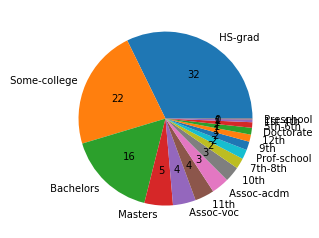

In [106]:
plt.pie(x = edu,labels = edu.index,autopct = '%.f')

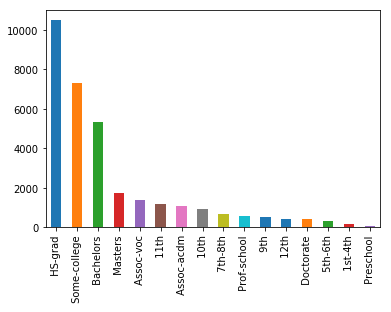

In [110]:
edu.plot.bar()

### end